# Analysis of Results

In [33]:
%pip install scikit_posthocs

     |████████████████████████████████| 43 kB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37902 sha256=e94824b9613663035428991e8140d518f0bebc86a8349a69617e2ecd81ae40dd
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [34]:
# Imports

# CSV
import csv

# Plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
DATA_PATH = "./drive/MyDrive/ML/ANALYSIS/"

## Training Curves

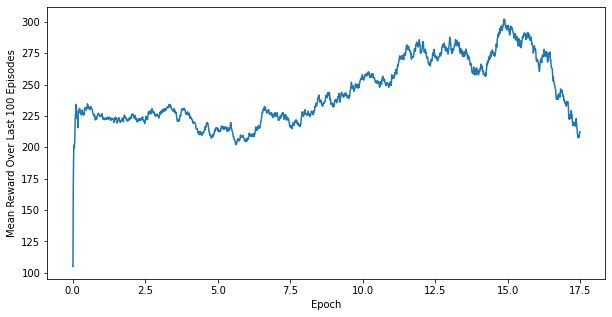

In [37]:
# FRAMES

# IMPORT DATA

fr = []

with open(DATA_PATH + 'frames.csv', newline='') as f:
    for line in f:
        fr.append(float(line.strip("\n")))

# PROCESS
EPISODES_PER_EPOCH = 99

av_fr = []
for i in range(0, len(fr)):
    if i == 0:
        av_fr.append(fr[i])
    elif i < EPISODES_PER_EPOCH:
        av_fr.append(np.mean(fr[:i + 1]))
    else:
        av_fr.append(np.mean(fr[i - EPISODES_PER_EPOCH: i]))


bins = [x/100 for x in range(len(av_fr))] 
plt.figure(figsize=(10, 5))
plt.plot(bins, av_fr)

# Plot
plt.xlabel("Epoch")
plt.ylabel("Mean Reward Over Last 100 Episodes")
plt.show()

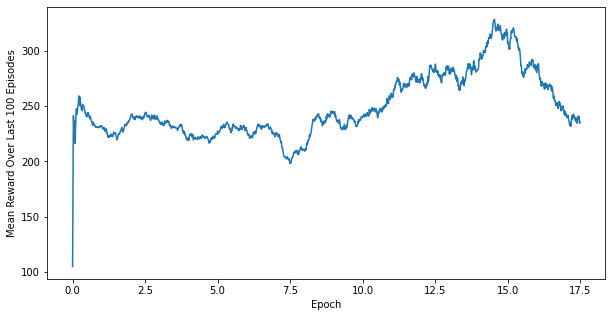

In [38]:
# RAM

# IMPORT DATA

ra = []

with open(DATA_PATH + 'ram.csv', newline='') as f:
    for line in f:
        ra.append(float(line.strip("\n")))

# PROCESS
EPISODES_PER_EPOCH = 99

av_ra = []
for i in range(0, len(ra)):
    if i == 0:
        av_ra.append(ra[i])
    elif i < EPISODES_PER_EPOCH:
        av_ra.append(np.mean(ra[:i + 1]))
    else:
        av_ra.append(np.mean(ra[i - EPISODES_PER_EPOCH: i]))


bins = [x/100 for x in range(len(av_ra))] 
plt.figure(figsize=(10, 5))
plt.plot(bins, av_ra)

# Plot
plt.xlabel("Epoch")
plt.ylabel("Mean Reward Over Last 100 Episodes")
plt.show()

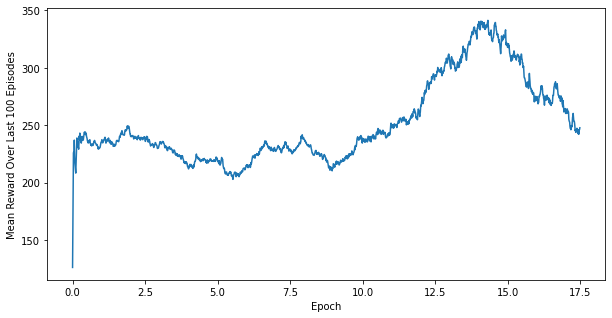

In [39]:
# HYBRID

# IMPORT DATA

hy = []

with open(DATA_PATH + 'hybrid.csv', newline='') as f:
    for line in f:
        hy.append(float(line.strip("\n")))

# PROCESS
EPISODES_PER_EPOCH = 99

av_hy = []
for i in range(0, len(hy)):
    if i == 0:
        av_hy.append(hy[i])
    elif i < EPISODES_PER_EPOCH:
        av_hy.append(np.mean(hy[:i + 1]))
    else:
        av_hy.append(np.mean(hy[i - EPISODES_PER_EPOCH: i]))


bins = [x/100 for x in range(len(av_hy))] 
plt.figure(figsize=(10, 5))
plt.plot(bins, av_hy)

# Plot
plt.xlabel("Epoch")
plt.ylabel("Mean Reward Over Last 100 Episodes")
plt.show()

## Test Scores

In [40]:
# IMPORT DATA
test_frames = []
test_ram = []
test_hybrid = []

with open(DATA_PATH + 'frames_test.csv', newline='') as f:
    for line in f:
        test_frames.append(float(line.strip("\n")))

with open(DATA_PATH + 'ram_test.csv', newline='') as f:
    for line in f:
        test_ram.append(float(line.strip("\n")))

with open(DATA_PATH + 'hybrid_test.csv', newline='') as f:
    for line in f:
        test_hybrid.append(float(line.strip("\n")))


In [41]:
# MEAN + STD
dictionary = {"MEAN":[np.mean(test_frames), np.mean(test_ram), np.mean(test_hybrid)],
              "STD":[np.std(test_frames), np.std(test_ram), np.std(test_hybrid)]}

df = pd.DataFrame(dictionary)
df

,MEAN,STD
0,201.6,110.803610
1,258.3,143.062259
2,252.0,132.483206


In [42]:
# Compare Frames with Ram
mannwhitneyu(test_frames, test_ram)

MannwhitneyuResult(statistic=39.5, pvalue=0.2233862112760267)

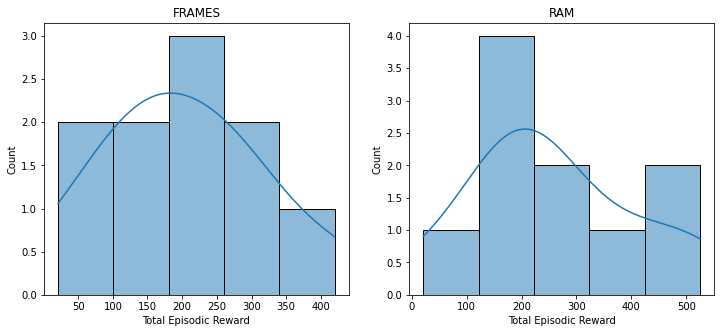

In [43]:
# PLOT DISTRIBUTIONS SUBPLOT
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].set_title('FRAMES')
ax[0].set_xlabel('Total Episodic Reward')
ax[0].set_ylabel('Count')

ax[1].set_title('RAM')
ax[1].set_xlabel('Total Episodic Reward')
ax[1].set_ylabel('Count')

# ax[2].set_title('HYBRID')
# ax[2].set_xlabel('Total Episodic Reward')
# ax[2].set_ylabel('Count')

# Plot FRAMES
sns.histplot(ax=ax[0], x=test_frames, stat='count', kde=1)

# Plot RAM
sns.histplot(ax=ax[1], x=test_ram, stat='count', kde=1)

# # Plot HYBRID
# sns.histplot(ax=ax[2], x=test_hybrid, stat='count', kde=1)

plt.show()

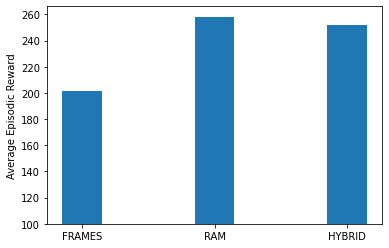

In [51]:
# PLOT BAR CHART OF MEAN SCORES
plt.ylabel('Average Episodic Reward')
y_offset = 100

plt.bar(x=['FRAMES', 'RAM', 'HYBRID'], bottom=y_offset, height=df['MEAN'] - y_offset, width=0.3)

plt.show()

In [46]:
# Kruskal-Wallis
kruskal(test_frames, test_ram, test_hybrid)

KruskalResult(statistic=0.9861821444594047, pvalue=0.6107356454760485)